[0 0 0]


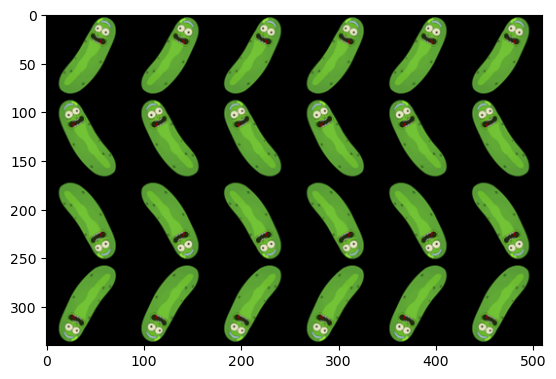

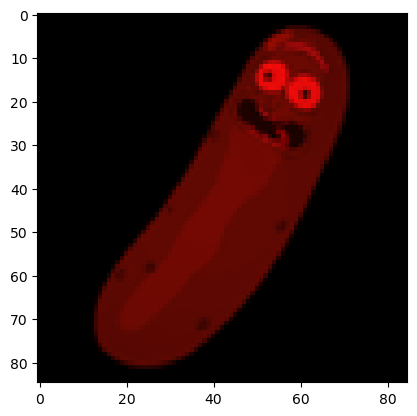

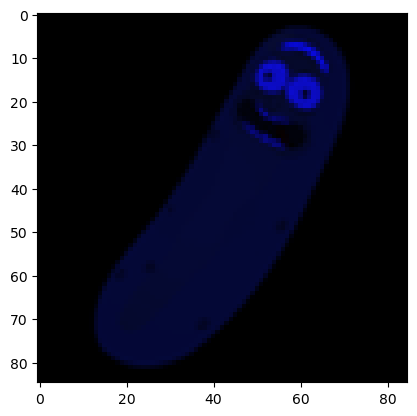

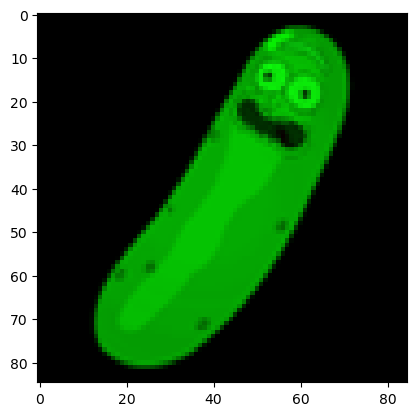

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

loc_input_img = os.path.join('image_raw.png')
i = Image.open(loc_input_img)
np_image = np.array(i)
np_image_resize = np_image[12:97, 22:107]

print(np_image_resize[0, 0, 0:3])


def Change_colorvalue(colorvalue, factor):
    return int(colorvalue*factor)

Change_colorvalue_vectorized = np.vectorize(Change_colorvalue)

def Change_color_image(image, color):
    #gaat de alle kleurkanalen behalve die van parameter color met een bepaalde factor verminderen
    # bv. color='r' -> kanalen blauw en groen worden met 95% verminderd
    new_image=image.copy()
    redvalue=image[0:,0:, 0]
    greenvalue=image[0:,0:, 1]
    bluevalue=image[0:,0:, 2]
    if color=='r':
        new_image[0:,0:, 0]=Change_colorvalue_vectorized(redvalue, 1 )
        new_image[0:,0:, 1]=Change_colorvalue_vectorized(greenvalue, 0.05)
        new_image[0:,0:, 2]=Change_colorvalue_vectorized(bluevalue, 0.05)
    if color=='g':
        new_image[0:,0:, 0]=Change_colorvalue_vectorized(redvalue, 0.05 )
        new_image[0:,0:, 1]=Change_colorvalue_vectorized(greenvalue, 1)
        new_image[0:,0:, 2]=Change_colorvalue_vectorized(bluevalue, 0.05)
    if color=='b':
        new_image[0:,0:, 0]=Change_colorvalue_vectorized(redvalue, 0.05 )
        new_image[0:,0:, 1]=Change_colorvalue_vectorized(greenvalue, 0.05)
        new_image[0:,0:, 2]=Change_colorvalue_vectorized(bluevalue, 1)
    return new_image


# creer matrix van images
# ----------------------------
def maak_basis_matrix_met_originele_images(matrix, image):
    # maak een array van dezelfde shape als matrix waarvan de elementen de allemaal de originele image bevatten
    nbr_of_rows = matrix.shape[0]
    nbr_of_columns = matrix.shape[1]
    # Maak een lege array met dtype=object
    array = np.empty((nbr_of_rows, nbr_of_columns), dtype=object)

    # Vul de array zodat elk element de originele image bevat
    for i in range(nbr_of_rows):
        for j in range(nbr_of_columns):
            array[i, j] = image  # Elk element is een image
    return array


def flip_left_right(image):
    return image[::, ::-1]


def flip_upside_down(image):
    return image[::-1]


def grid_with_flips_optie1(image, matrix):
    basis_matrix = maak_basis_matrix_met_originele_images(matrix, image)

    for row in range(basis_matrix.shape[0]):
        for column in range(basis_matrix.shape[1]):
            if matrix[row, column] == 1:
                basis_matrix[row, column] = flip_left_right(image)
            if matrix[row, column] == 2:
                basis_matrix[row, column] = flip_upside_down(image)
            if matrix[row, column] == 3:
                basis_matrix[row, column] = flip_left_right(flip_upside_down(image))

    return stack_images(basis_matrix)


# werkt niet
def grid_with_flips_optie2(image, matrix):
    basis_matrix = maak_basis_matrix_met_originele_images(matrix, image)

    mask_flip_left_right = matrix == 1
    mask_flip_upside_down = matrix == 2

    result_matrix = basis_matrix.copy()

    result_matrix[mask_flip_left_right] = [flip_left_right(img) for img in basis_matrix[mask_flip_left_right]]
    return stack_images(result_matrix)


# werkt niet
def grid_with_flips_optie3(image, matrix):
    basis_matrix = maak_basis_matrix_met_originele_images(matrix, image)

    mask_flip_left_right = matrix == 1
    mask_flip_upside_down = matrix == 2
    result_matrix = basis_matrix.copy()

    result_matrix[mask_flip_left_right] = flip_left_right(result_matrix[mask_flip_left_right])
    return stack_images(result_matrix)


def stack_images(array_of_images):
    # voegt alle individuele images samen tot 1 image

    # voor elke rij gaan we de images in alle kolommen stacken tot 1 image met als resultaat een array van nbr_of_rows rijen en 1 kolom
    nbr_of_rows = array_of_images.shape[0]
    array = np.empty((nbr_of_rows), dtype=object)
    for rownbr in range(nbr_of_rows):
        array[rownbr] = np.hstack(array_of_images[rownbr])

    # de images van alle rijen (in 1 kolom) worden nu gestacked zodat we slechts 1 image overhouden
    result = np.vstack(array)
    return result


# definieer de shape van de matrix en welke transformaties er moeten gebeuren op de verschillende images
# geen transformatie = 0
# flip left right = 1
# flip upside down = 2
# flip upside down en left right = 3
matrix = np.array([[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3]])
plt.imshow(grid_with_flips_optie1(np_image_resize, matrix))
plt.show()

# verander de image naar een bepaalde kleur ('r', 'g', 'b')
red_image=Change_color_image(np_image_resize, 'r')
plt.imshow(red_image)
plt.show()
blue_image=Change_color_image(np_image_resize, 'b')
plt.imshow(blue_image)
plt.show()
green_image=Change_color_image(np_image_resize, 'g')
plt.imshow(green_image)
plt.show()